# Cyberbullying Detection using NLP
---
**Submitted By: Nileem Kaveramma C C**

**Register Number: 2348441**
 **|** **Christ University**
 
---

**Aim**:
To develop a Natural Language Processing (NLP) system that summarizes information regarding victims of cybercrimes based on a social media dataset.

---

**Objective**:
* To analyze a social media dataset for insights into cybercrime patterns.
* To identify and summarize key aspects related to victims of cybercrimes.
* To apply NLP techniques for cleaning, feature extraction, and summarization.
* To develop a system capable of highlighting trends and categories of cybercrimes.
  
---

**Problem Statement:**
The rise of social media has revolutionized communication but has also led to a surge in cybercrimes such as cyberbullying and harassment, causing severe psychological and emotional distress to victims. Despite the prevalence of such crimes, understanding their patterns and impacts remains limited, hindering the development of effective solutions. This project addresses this gap by building an NLP-based system to process social media data and summarize incidents related to cybercrime victims. By extracting meaningful patterns and insights, the system aids stakeholders like policymakers and platform moderators in developing targeted interventions, emphasizing the importance of technology in combating online abuse and promoting safer digital spaces.

---

**Methodology**
* Dataset Loading and Exploration: Importing the dataset and performing exploratory data analysis (EDA) to understand the distribution and characteristics of the data.
* Data Cleaning: Removing noise such as URLs, mentions, hashtags, and stopwords from the text to ensure clean input for analysis.
* Feature Extraction: Employing techniques such as Bag-of-Words (BoW) or TF-IDF to transform the cleaned text into a structured format for processing.
* Classification: Using machine learning models (e.g., Logistic Regression) to categorize text into cyberbullying-related categories.
* Summarization: Extracting meaningful summaries from the processed data related to victims of cybercrimes.

---

**Steps**
* Import Libraries: Load necessary libraries such as NLTK, sklearn, and pandas for NLP and data analysis.
* Load Dataset: Read the social media dataset and explore its structure.
* Clean Data:
    * Remove irrelevant elements like links and special characters.
    * Tokenize text and remove stopwords.
    * Apply stemming for word normalization.
* EDA:
    * Analyze word frequency and class distribution.
    * Visualize key insights using bar plots, word clouds, and sentiment analysis.
* Feature Extraction: Convert cleaned text into a numerical format using CountVectorizer.
* Model Development:
    * Split data into training and testing sets.
    * Train a Logistic Regression model for text classification.
    * Evaluate the model using metrics like accuracy, precision, and recall.
* Generate Summaries: Use the model and extracted data to provide a concise summary of cybercrime victims' experiences.

---

**CODE:**

**Importing Necessary Libraries**

In [1]:
import pandas as pd
import re
import nltk
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
from sklearn.feature_extraction.text import CountVectorizer

import seaborn as sns
import matplotlib.pyplot as plt

from tqdm.auto import tqdm
import time

**Loading the Dataset**


In [2]:
df = pd.read_csv('/kaggle/input/cyberbullying-classification/cyberbullying_tweets.csv', nrows = 20000)
df

,tweet_text,cyberbullying_type
0,"In other words #katandandre, your food was cra...",not_cyberbullying
1,Why is #aussietv so white? #MKR #theblock #ImA...,not_cyberbullying
2,@XochitlSuckkks a classy whore? Or more red ve...,not_cyberbullying
3,"@Jason_Gio meh. :P thanks for the heads up, b...",not_cyberbullying
4,@RudhoeEnglish This is an ISIS account pretend...,not_cyberbullying
...,...,...
19995,I am Christian who definitely does not support...,religion
19996,@yousufpoosuf @RKingLive2Dance @izrinhariri No...,religion
19997,How can you say Barack Obama was the best pres...,religion
19998,Another Mentally ill asylum seeker. WTHell do ...,religion


In [7]:
df.head()

,tweet_text,cyberbullying_type
0,"In other words #katandandre, your food was cra...",not_cyberbullying
1,Why is #aussietv so white? #MKR #theblock #ImA...,not_cyberbullying
2,@XochitlSuckkks a classy whore? Or more red ve...,not_cyberbullying
3,"@Jason_Gio meh. :P thanks for the heads up, b...",not_cyberbullying
4,@RudhoeEnglish This is an ISIS account pretend...,not_cyberbullying


In [8]:
df.tail()

,tweet_text,cyberbullying_type
19995,I am Christian who definitely does not support...,religion
19996,@yousufpoosuf @RKingLive2Dance @izrinhariri No...,religion
19997,How can you say Barack Obama was the best pres...,religion
19998,Another Mentally ill asylum seeker. WTHell do ...,religion
19999,shame on you. Bhagat singh did not kill innoce...,religion


In [9]:
df.shape

(20000, 2)

**Exploratory Data Analysis(EDA)**

---

**1. Handling Null Values**

In [10]:
df.isna().any()

tweet_text            False
cyberbullying_type    False
dtype: bool

In [11]:
df.isna().sum()

tweet_text            0
cyberbullying_type    0
dtype: int64

**2. Handling Duplicate Values**

In [12]:
df.nunique()

tweet_text            19915
cyberbullying_type        3
dtype: int64

In [13]:
df['tweet_text'].nunique()

19915

**3. Class Distributions**

In [14]:
df['cyberbullying_type'].value_counts()

gender               7973
not_cyberbullying    7945
religion             4082
Name: cyberbullying_type, dtype: int64

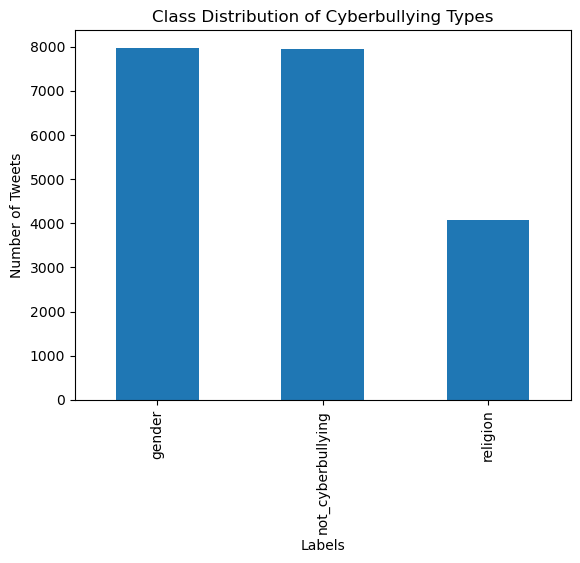

In [15]:
# Creating a bar plot of the class distribution
class_counts = df['cyberbullying_type'].value_counts()
class_counts.plot(kind='bar')
plt.title('Class Distribution of Cyberbullying Types')
plt.xlabel('Labels')
plt.ylabel('Number of Tweets')
plt.show()

**4. Word Count**

In [16]:
from collections import Counter
import re

import nltk
from nltk.corpus import stopwords

In [29]:
# Concatenating all tweet texts into a single string
all_text = ' '.join(df['tweet_text'].values)

# Removing URLs, mentions, and hashtags from the text
all_text = re.sub(r'http\S+', '', all_text)
all_text = re.sub(r'@\S+', '', all_text)
all_text = re.sub(r'#\S+', '', all_text)

# Split the text into individual words
words = all_text.split()

In [33]:
# Removing the stop words
stop_words = set(stopwords.words('english'))
words = [word for word in words if not word in stop_words]

In [34]:
# Count the frequency of each word
word_counts = Counter(words)
top_words = word_counts.most_common(100)
top_words

[('I', 5256),
 ('rape', 2962),
 ('gay', 2507),
 ('RT', 2103),
 ('jokes', 2038),
 ('like', 1739),
 ('people', 1336),
 ("I'm", 1167),
 ('&amp;', 1117),
 ('joke', 1114),
 ('The', 1021),
 ('call', 955),
 ('u', 942),
 ('You', 932),
 ('think', 896),
 ('get', 863),
 ('make', 862),
 ('women', 811),
 ('know', 739),
 ('one', 738),
 ('Muslim', 733),
 ('Muslims', 728),
 ('female', 703),
 ('sexist', 668),
 ('-', 650),
 ('And', 638),
 ('would', 637),
 ('jokes,', 615),
 ('Christian', 605),
 ('woman', 571),
 ('If', 561),
 ('support', 560),
 ('say', 542),
 ('even', 523),
 ('want', 520),
 ('see', 512),
 ('right', 504),
 ('men', 502),
 ('idiots', 488),
 ('never', 483),
 ('still', 469),
 ('But', 467),
 ('made', 458),
 ('go', 456),
 ('really', 451),
 ('idiot', 447),
 ('This', 445),
 ('A', 444),
 ('So', 443),
 ('making', 443),
 ('.', 430),
 ('Islamic', 429),
 ('bitch', 428),
 ('need', 418),
 ("can't", 412),
 ('hate', 410),
 ('Rape', 409),
 ('Kat', 399),
 ('What', 390),
 ('They', 386),
 ('said', 384),
 ('bul

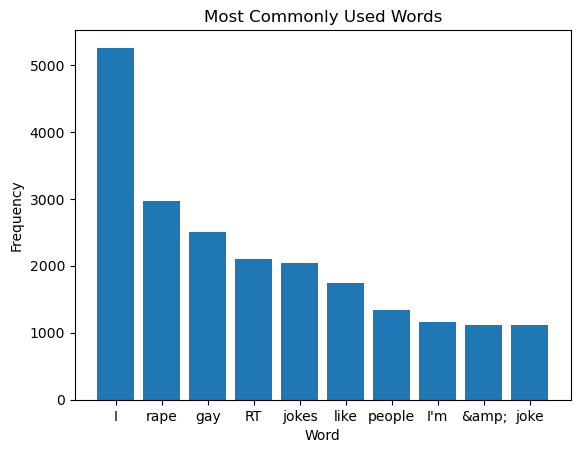

In [35]:
# Create a bar chart of the most common words
top_words = word_counts.most_common(10) 
x_values = [word[0] for word in top_words]
y_values = [word[1] for word in top_words]
plt.bar(x_values, y_values)
plt.xlabel('Word')
plt.ylabel('Frequency')
plt.title('Most Commonly Used Words')
plt.show()

**Visualizations**

---

**1. Wordclouds**

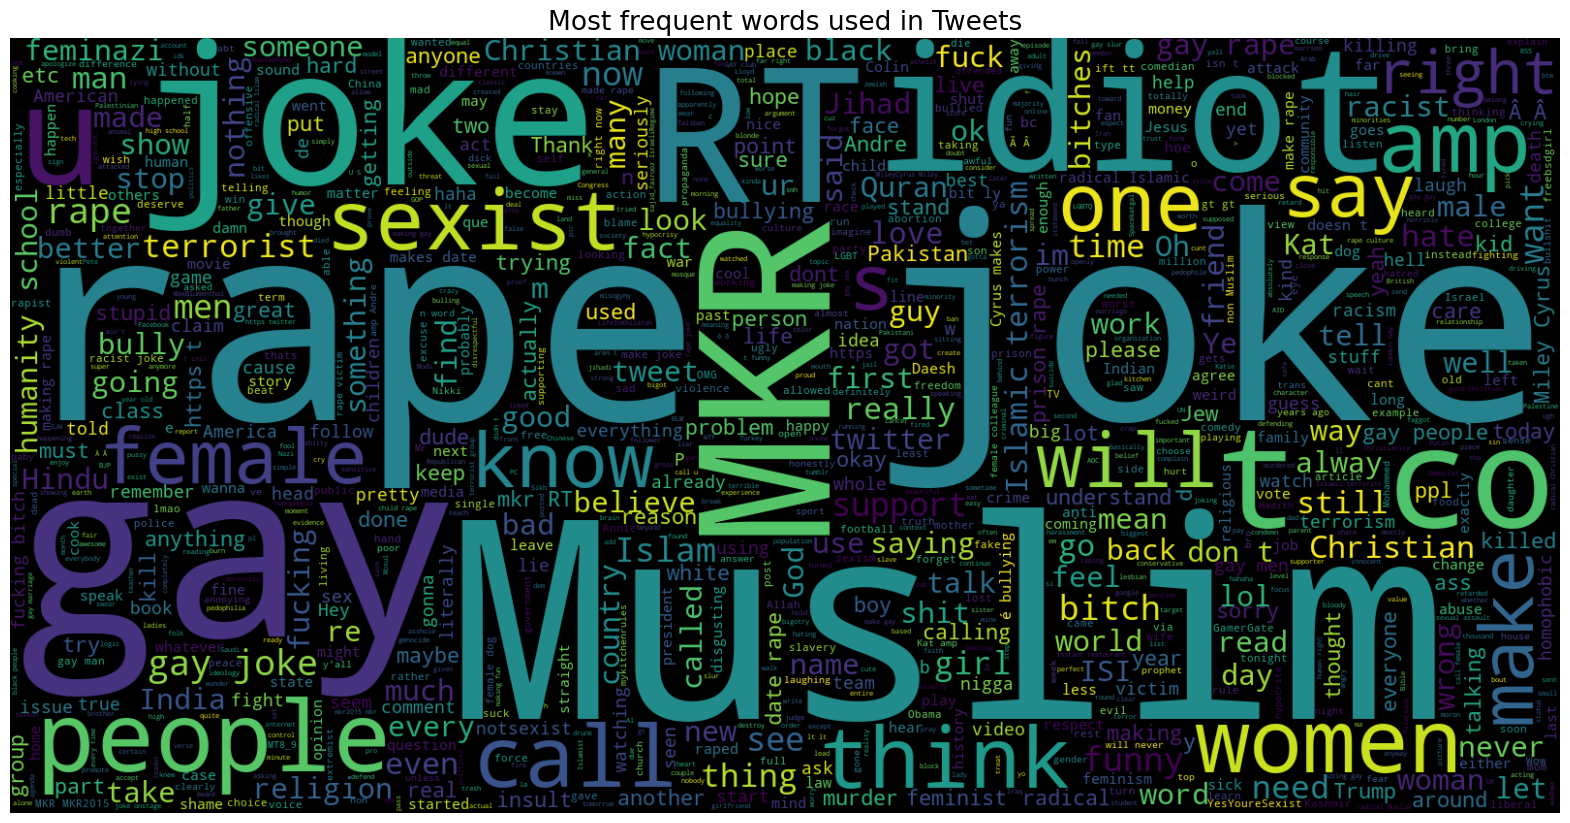

In [36]:
from wordcloud import WordCloud

text = ' '.join([word for word in df['tweet_text']])
plt.figure(figsize=(20,15), facecolor='None')
wordcloud = WordCloud(max_words=1000, width=1600, height=800).generate(text)
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.title('Most frequent words used in Tweets', fontsize=19)
plt.show()

**2. Sentiment Analysis Plot**

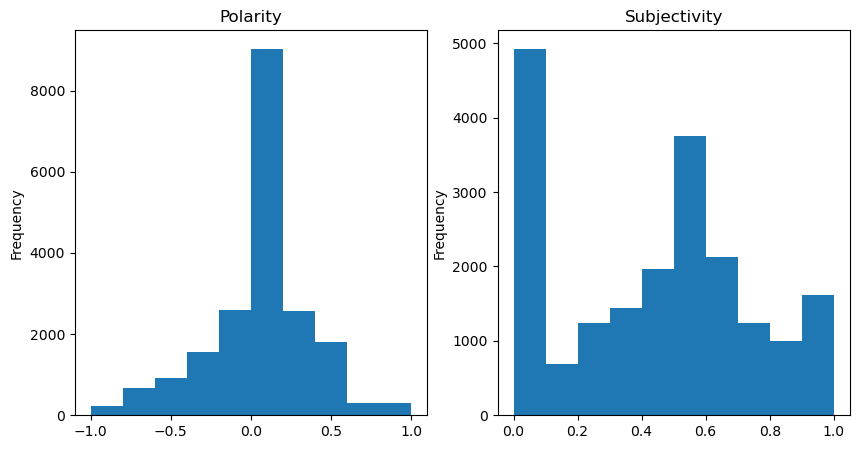

In [37]:
import pandas as pd
import matplotlib.pyplot as plt
from textblob import TextBlob

# perform sentiment analysis on each text in DataFrame
sentiment_scores = []
for text in df['tweet_text']:
    analysis = TextBlob(text)
    sentiment_scores.append((analysis.sentiment.polarity, analysis.sentiment.subjectivity))

# create DataFrame with sentiment scores
sentiment_df = pd.DataFrame(sentiment_scores, columns=['polarity', 'subjectivity'])

# plot distribution of sentiment scores
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(10, 5))
sentiment_df['polarity'].plot(kind='hist', ax=axes[0], title='Polarity')
sentiment_df['subjectivity'].plot(kind='hist', ax=axes[1], title='Subjectivity')
plt.show()

**4. Part-of-Speech (POS) Tagging Plot**

In [40]:
import spacy
from spacy import displacy

#sample text
text = df['tweet_text'].iloc[1]

#load pre-trained POS tagging model
nlp = spacy.load('en_core_web_sm')

#perform POS tagging
doc = nlp(text)

#visualize POS tagging
displacy.render(doc, style='dep', jupyter=True, options={'distance': 90})

**5. Topic Modeling Visualization**

In [41]:
#installing pyLDAvis for visually explore and interpret topic models
!pip install pyLDAvis

In [42]:
import gensim
import pyLDAvis 
from pyLDAvis import *
import pyLDAvis.gensim as gensimvis

# Preprocessing
tokens = [[word for word in sentence.split()] for sentence in df['tweet_text']]
dictionary = gensim.corpora.Dictionary(tokens)
corpus = [dictionary.doc2bow(token) for token in tokens]

# Topic Modeling
num_topics = 10
lda_model = gensim.models.LdaModel(corpus=corpus, id2word=dictionary, num_topics=num_topics)

# Visualization
pyLDAvis.enable_notebook()
vis = gensimvis.prepare(lda_model, corpus, dictionary)
vis

/opt/conda/lib/python3.7/site-packages/pyLDAvis/_prepare.py:248: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  by='saliency', ascending=False).head(R).drop('saliency', 1)


PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
8      0.328230 -0.017435       1        1  46.580024
5      0.282947 -0.015887       2        1  25.054167
9      0.091097 -0.155746       3        1   6.756684
3      0.071721  0.248031       4        1   6.643255
7     -0.003676  0.010174       5        1   3.573743
6     -0.063316 -0.036617       6        1   2.727426
1     -0.117482 -0.031194       7        1   2.659723
2     -0.189281 -0.012636       8        1   2.224870
4     -0.180369  0.019403       9        1   2.135199
0     -0.219871 -0.008092      10        1   1.644908, topic_info=           Term         Freq        Total Category  logprob  loglift
8069       rape  2370.000000  2370.000000  Default  30.0000  30.0000
1141        gay  2228.000000  2228.000000  Default  29.0000  29.0000
5833      jokes  1749.000000  1749.000000  Default  28.0000  28.0000
6926  Christian  1274.000000  1274.000000  Default  27.0000  27.0000
783      Muslim  1485.000000  1485.000000  Default  26.0000  26.0000
...         ...          ...          ...      ...      ...      ...
3999     Russia    28.551748    30.109122  Topic10  -5.5198   4.0544
3898         Im    63.367220    67.022345  Topic10  -4.7226   4.0514
999        WHAT    16.861888    18.165439  Topic10  -6.0465   4.0330
2783      abuse    66.780775    88.146859  Topic10  -4.6701   3.8299
1575     @MT8_9    48.060634    65.216923  Topic10  -4.9991   3.8022

[573 rows x 6 columns], token_table=      Topic      Freq    Term
term                         
8062      4  0.785489  #Islam
8062      5  0.204554  #Islam
10        1  0.385947    #MKR
10        2  0.330415    #MKR
10        3  0.022213    #MKR
...     ...       ...     ...
8         6  0.000551    your
8         7  0.001101    your
8         8  0.001101    your
8         9  0.003304    your
8689      3  0.995684  you’re

[1202 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[9, 6, 10, 4, 8, 7, 2, 3, 5, 1])

# Natural Language Processing
---

**1. Data Cleaning**

In [44]:
# Clean the data
def clean_text(text):
    # Remove HTML tags
    text = re.sub('<.*?>', '', text)
    
    # Remove non-alphabetic characters and convert to lowercase
    text = re.sub('[^a-zA-Z]', ' ', text).lower()
    
    # Remove URLs, mentions, and hashtags from the text
    text = re.sub(r'http\S+', '', text)
    text = re.sub(r'@\S+', '', text)
    text = re.sub(r'#\S+', '', text)
    
    # Tokenize the text
    words = nltk.word_tokenize(text)
    
    # Remove stopwords
    words = [w for w in words if w not in stopwords.words('english')]
    
    # Stem the words
    stemmer = PorterStemmer()
    words = [stemmer.stem(w) for w in words]
    
    # Join the words back into a string
    text = ' '.join(words)
    return text

In [45]:
%%time

tqdm.pandas()

df['cleaned_text'] = df['tweet_text'].progress_apply(clean_text)

  0%|          | 0/20000 [00:00<?, ?it/s]

CPU times: user 1min 5s, sys: 10.4 s, total: 1min 16s
Wall time: 1min 16s


**2. Feature Extraction**

In [46]:
# Create the Bag of Words model
cv = CountVectorizer()
X = cv.fit_transform(df['cleaned_text']).toarray()
y = df['cyberbullying_type']

In [47]:
# Split the data into training and testing sets
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Classification Model
---

**1. Logistic Regression Model**

In [48]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
# train a Logistic Regression Model
clf = LogisticRegression(max_iter = 1000)

In [49]:
clf.fit(X_train, y_train)

LogisticRegression(max_iter=1000)

**2. Predictions**

In [50]:
# evaluate the classifier on the test set
y_pred = clf.predict(X_test)
y_pred

array(['gender', 'not_cyberbullying', 'gender', ..., 'gender',
       'not_cyberbullying', 'gender'], dtype=object)

**3. Accuracy Score**

In [51]:
acc = accuracy_score(y_test, y_pred)
print("Accuracy:", acc)

Accuracy: 0.914


**4. Confusion Matrix**

In [52]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
cm

array([[1425,  174,    3],
       [  71, 1498,   31],
       [   9,   56,  733]])

<AxesSubplot:>

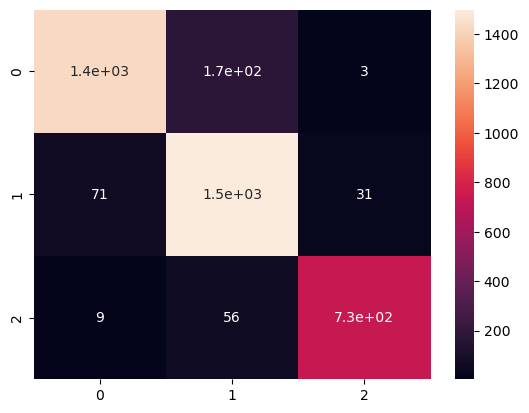

In [53]:
import seaborn as sns
sns.heatmap(cm, annot=True)

**5. Classification Report**

In [54]:
from sklearn.metrics import classification_report
report = classification_report(y_test, y_pred)
print(report)

                   precision    recall  f1-score   support

           gender       0.95      0.89      0.92      1602
not_cyberbullying       0.87      0.94      0.90      1600
         religion       0.96      0.92      0.94       798

         accuracy                           0.91      4000
        macro avg       0.92      0.91      0.92      4000
     weighted avg       0.92      0.91      0.91      4000



**Interpretation:**
The project demonstrates a practical application of Natural Language Processing (NLP) techniques to detect and classify cyberbullying incidents using a social media dataset. It explores various aspects of the dataset, including class distribution and word frequency, to uncover underlying patterns and trends. The classification is performed across three categories: gender, religion, and not_cyberbullying, revealing the prevalence of cyberbullying related to these themes.

A Logistic Regression model is employed for classification, achieving an impressive accuracy score of 91.4%, which signifies the model's reliability and effectiveness in categorizing social media text. This is further supported by detailed evaluations, such as a confusion matrix and classification report, which highlight the model's high precision, recall, and F1-scores for all categories.

Key insights from Exploratory Data Analysis (EDA), including word clouds and sentiment analysis, provide a deeper understanding of the linguistic patterns and sentiments within the dataset. For instance, frequent usage of negative or offensive words in specific contexts points to the nature and intensity of cyberbullying.

Overall, the project successfully implements NLP techniques to address the critical issue of cyberbullying, offering a framework that can be expanded for real-world applications. It emphasizes the importance of technological solutions in mitigating the adverse effects of cybercrimes and contributes to the development of safer online platforms.

---

**Conclusion:**
This project effectively demonstrates the application of NLP in summarizing and categorizing social media data related to cybercrime victims. The system achieved a high accuracy score of 91.4%, showcasing its reliability in correctly identifying and categorizing cyberbullying-related content, further emphasizing its effectiveness in providing actionable insights. Additionally, The system provides valuable insights into patterns of cyberbullying and its impact, paving the way for developing targeted solutions to mitigate such issues. 

---